In [1]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation="sigmoid", input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train.reshape(60000, 28, 28, 1), y_train, epochs=10, batch_size=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 5s 77us/step - loss: 1.3365 - acc: 0.6317
Epoch 2/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.6293 - acc: 0.7801
Epoch 3/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.5310 - acc: 0.8118
Epoch 4/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.4555 - acc: 0.8388
Epoch 5/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.4212 - acc: 0.8500
Epoch 6/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.3941 - acc: 0.8606
Epoch 7/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.3706 - acc: 0.8666
Epoch 8/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.3572 - acc: 0.8718
Epoch 9/10
60000/60000 [==============================] - 4s 69us/step - loss: 0

In [10]:
model.layers[0].weights[0]

<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 1, 10) dtype=float32_ref>

In [4]:
import keras.backend as K

data = K.eval(model.layers[0].weights[0])
print(data)

[[[[ 0.04177773  0.1365259   0.08932077 -0.18977232  0.11279523
     0.21023674 -0.22182854  0.05744099  0.17055108  0.0271113 ]]

  [[-0.23886415 -0.2451612   0.20832844 -0.05492402 -0.0351461
     0.16345711 -0.08475101  0.13598229 -0.16372462  0.15640359]]

  [[ 0.2170342  -0.15060978 -0.02439535  0.15193535 -0.22746746
     0.10905469  0.06223512 -0.0655081  -0.03046855 -0.15537083]]]


 [[[-0.05391142  0.17311344  0.08251261 -0.09052712  0.1433493
     0.06112537 -0.28318942 -0.07190022 -0.23275238  0.12653755]]

  [[ 0.08624288 -0.22586127 -0.22517486  0.22701982 -0.14808936
    -0.22928596 -0.1760678  -0.03399464  0.14676552  0.16287136]]

  [[-0.01952357  0.0741477   0.13433535  0.15922461 -0.02200254
    -0.00905363  0.14054698  0.04821808 -0.01028671  0.18994588]]]


 [[[-0.21014054  0.08052576 -0.28294924 -0.12238106 -0.08295851
    -0.06383465 -0.20014907 -0.18681704  0.02775868 -0.21421796]]

  [[-0.2179666  -0.03373239 -0.27385545  0.05869723 -0.05257912
    -0.15323558  

In [7]:
data[:, :, :, 0].reshape(3, 3)

array([[ 0.04177773, -0.23886415,  0.2170342 ],
       [-0.05391142,  0.08624288, -0.01952357],
       [-0.21014054, -0.2179666 ,  0.09525406]], dtype=float32)

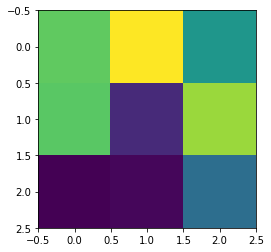

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data[:, :, :, 2].reshape(3, 3))
plt.show()

### Vergleich: https://en.wikipedia.org/wiki/Sobel_operator

$ {\displaystyle \mathbf {G} _{x}={\begin{bmatrix}+1&0&-1\\+2&0&-2\\+1&0&-1\end{bmatrix}}*\mathbf {A} \quad {\mbox{and}}\quad \mathbf {G} _{y}={\begin{bmatrix}+1&+2&+1\\0&0&0\\-1&-2&-1\end{bmatrix}}*\mathbf {A} } $ 